Notes/To do:
- in SVM hyperparameter study, generic init_clf is not used but instead svm.SVC(), since for some reason init_clf does not work on svm.SVC. NOTE THAT THIS IS HARD-CODED IN HYPERPARAM_EXPLORER

# Preamble

In [12]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools as it
from sklearn import datasets
from sklearn import svm
from sklearn import tree
from sklearn import ensemble
from sklearn import neighbors
from sklearn import neural_network
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from hyperparams import hyperparam_explorer # my package
from hyperparams import init_clf
%config InlineBackend.figure_format = 'retina'

# Config

In [13]:
# Config
RND_SEED        = 0
CLF_DICT        = {'svm': svm.SVC(),
                   'dt':  tree.DecisionTreeClassifier(),
                   'rf':  ensemble.RandomForestClassifier(),
                   'knn': neighbors.KNeighborsClassifier(),
                   'ann': neural_network.MLPClassifier()}

# Methods

In [14]:
def shuffle(df):
    """
    Shuffles dataset using seed specified in RND_SEED (see config part above).
    
        df:  Dataset to be shuffled.
        
    Returns shuffled dataset.
    """
    
    return(df.sample(frac=1, random_state=np.random.RandomState(seed=RND_SEED)))

# Data preparation

## wdbc: Wisconsin Breast Cancer data

In [16]:
# Load, prepare, and shuffle breast cancer data
wdbc_X_and_y = pd.read_csv('data/wdbc.data', header = None).iloc[:, 1:] # drop ID, then first col = y
wdbc_X_and_y = shuffle(wdbc_X_and_y)
wdbc_y = wdbc_X_and_y.iloc[:, 0]
wdbc_X = wdbc_X_and_y.iloc[:, 1:]

print("wdbc total sample size: {}".format(wdbc_X.shape[0]))

# Transform y from (B, M) to (-1, 1)
wdbc_y = wdbc_y.map({'B': -1, 'M': 1})

# Split to 80% training and 20% test set
wdbc_X_train, wdbc_X_test, wdbc_y_train, wdbc_y_test = \
    model_selection.train_test_split(wdbc_X, wdbc_y, test_size=0.2)

wdbc total sample size: 569


## income: US Census Income data

In [28]:
# Load, prepare, and shuffle adult income data
income_X_and_y = pd.read_csv('data/adult.data', header=None)
income_X_and_y.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                         'marital-status', 'occupation', 'relationship',
                         'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
                         'native-country', 'income']
income_X_and_y = shuffle(income_X_and_y)
print("Income total sample size: {}".format(income_X_and_y.shape[0]))

# one-hot encode categorical variables
income_categorical_vars = ['workclass', 'education', 'marital-status', 'occupation',
                           'relationship', 'race', 'sex', 'native-country']
income_X_and_y_onehot = pd.DataFrame()
for var in income_categorical_vars:
    dummy_coded_var_df = pd.get_dummies(income_X_and_y[var], prefix=var)
    income_X_and_y_onehot = pd.concat([income_X_and_y_onehot, dummy_coded_var_df], axis=1)

# add remaining columns to one-hot encoded df
income_X_and_y = pd.concat([income_X_and_y_onehot,
                            income_X_and_y.loc[:, income_X_and_y.columns[
                                np.logical_not(np.in1d(income_X_and_y.columns, income_categorical_vars))]]],
                           axis=1)

income_y = income_X_and_y.loc[:, 'income']
income_X = income_X_and_y.drop('income', axis=1)

# Transform y from (<=50K, >50K) to (-1, 1)
income_y = income_y.map({' <=50K': -1, ' >50K': 1})

# Split to 80% training and 20% test set
income_X_train, income_X_test, income_y_train, income_y_test = \
    model_selection.train_test_split(income_X, income_y, test_size = 0.2)

# Hard-limit size of training set to 5000 for computational reasons
income5000_X_train, income5000_X_test, income5000_y_train, income5000_y_test = \
    model_selection.train_test_split(income_X, income_y, train_size=5000)

Income total sample size: 32561


/home/maxi/.anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [21]:
?model_selection.train_test_split

## Iris data

In [20]:
iris_X = datasets.load_iris()['data']
iris_y = datasets.load_iris()['target']
iris_X_train, iris_X_test, iris_y_train, iris_y_test = \
    model_selection.train_test_split(iris_X, iris_y, test_size=0.2)
print("Iris total sample size: {}".format(iris_X.shape[0]))

Iris total sample size: 150


# Run hyperparam study

## knn: k (1:50); wdbc/income_full/iris

In [ ]:
# data_dict       = {'wdbc':   [wdbc_X_train, wdbc_y_train],
#                    'income': [income_X_train, income_y_train],
#                    'iris':   [iris_X_train, iris_y_train]}

In [8]:
# hyperparam_dict = {'knn': {'n_neighbors': np.arange(1, 51)}}
# expl = hyperparam_explorer(data_dict, hyperparam_dict, CLF_DICT, cv=5)
# expl.explore()

In [9]:
# result_dict = expl.get_results()
# result_dict

In [10]:
# expl.save('wdbc_income_iris_knn_k_1_50')

## svm: C (1e-7:1e3) with kernel='linear'; wdbc/income_5000/iris

In [29]:
# data_dict       = {'wdbc':   [wdbc_X_train, wdbc_y_train],
#                    'income': [income5000_X_train, income5000_y_train],
#                    'iris':   [iris_X_train, iris_y_train]}

In [30]:
# hyperparam_dict = {'svm': {'C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]}}
# expl = hyperparam_explorer(data_dict, hyperparam_dict, CLF_DICT, cv=5)
# expl.explore()

Working on part 1 of 33...
Working on part 2 of 33...
Working on part 3 of 33...
Working on part 4 of 33...
Working on part 5 of 33...
Working on part 6 of 33...
Working on part 7 of 33...
Working on part 8 of 33...
Working on part 9 of 33...
Working on part 10 of 33...
Working on part 11 of 33...
Working on part 12 of 33...
Working on part 13 of 33...
Working on part 14 of 33...
Working on part 15 of 33...
Working on part 16 of 33...
Working on part 17 of 33...
Working on part 18 of 33...
Working on part 19 of 33...
Working on part 20 of 33...
Working on part 21 of 33...
Working on part 22 of 33...
Working on part 23 of 33...
Working on part 24 of 33...
Working on part 25 of 33...
Working on part 26 of 33...
Working on part 27 of 33...
Working on part 28 of 33...
Working on part 29 of 33...
Working on part 30 of 33...
Working on part 31 of 33...
Working on part 32 of 33...
Working on part 33 of 33...


{'income': {'svm':                C  scores_mean  scores_sd
  0   1.000000e-07     0.753600   0.000302
  1   1.000000e-06     0.753600   0.000302
  2   1.000000e-05     0.753600   0.000302
  3   1.000000e-04     0.753600   0.000302
  4   1.000000e-03     0.753600   0.000302
  5   1.000000e-02     0.753600   0.000302
  6   1.000000e-01     0.753600   0.000302
  7   1.000000e+00     0.754200   0.002306
  8   1.000000e+01     0.752002   0.003998
  9   1.000000e+02     0.752002   0.003998
  10  1.000000e+03     0.752002   0.003998},
 'iris': {'svm':                C  scores_mean  scores_sd
  0   1.000000e-07     0.683389   0.013708
  1   1.000000e-06     0.683389   0.013708
  2   1.000000e-05     0.683389   0.013708
  3   1.000000e-04     0.683389   0.013708
  4   1.000000e-03     0.683389   0.013708
  5   1.000000e-02     0.683389   0.013708
  6   1.000000e-01     0.940217   0.064895
  7   1.000000e+00     0.965942   0.017048
  8   1.000000e+01     0.966583   0.016809
  9   1.000000e+02  

In [56]:
# expl.save('wdbc_income5000_iris_svm_linear_C_1e-7_1e3')

# Plot results

## knn: k (1:50); wdbc/income_full/iris

In [62]:
knn_expl = hyperparam_explorer.load('./wdbc_income_iris_knn_k_1_50')
knn_expl_results = knn_expl.get_results()

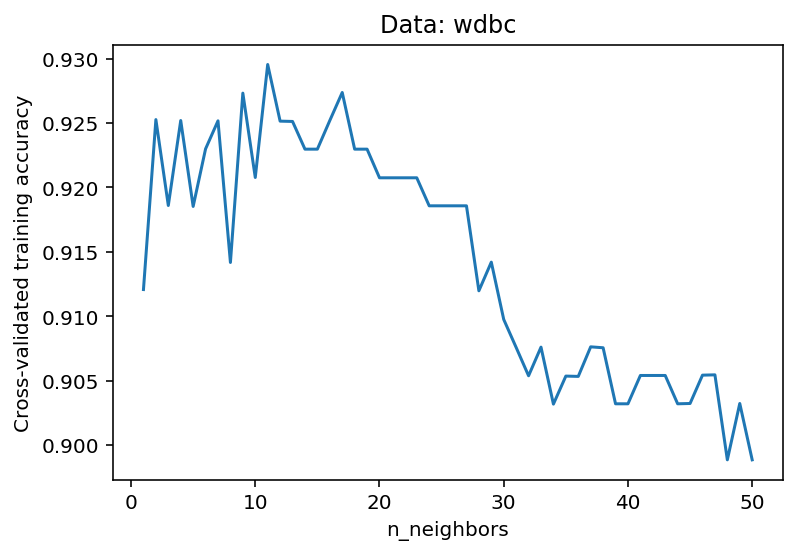

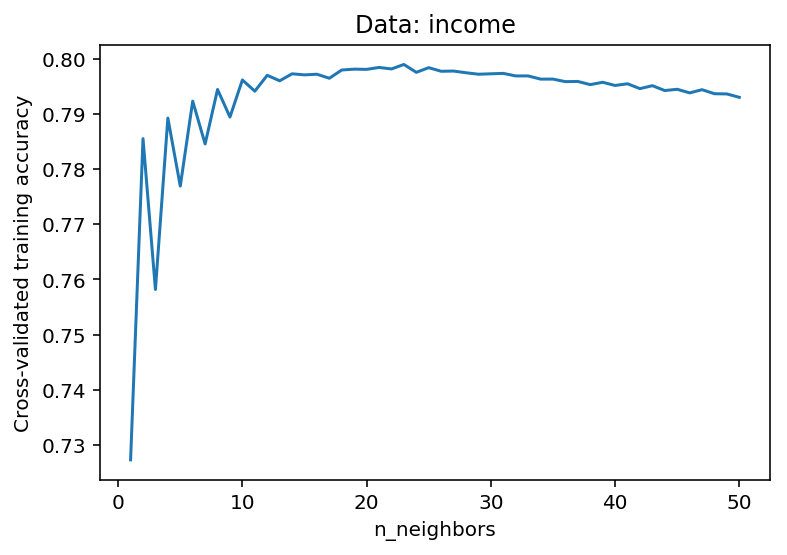

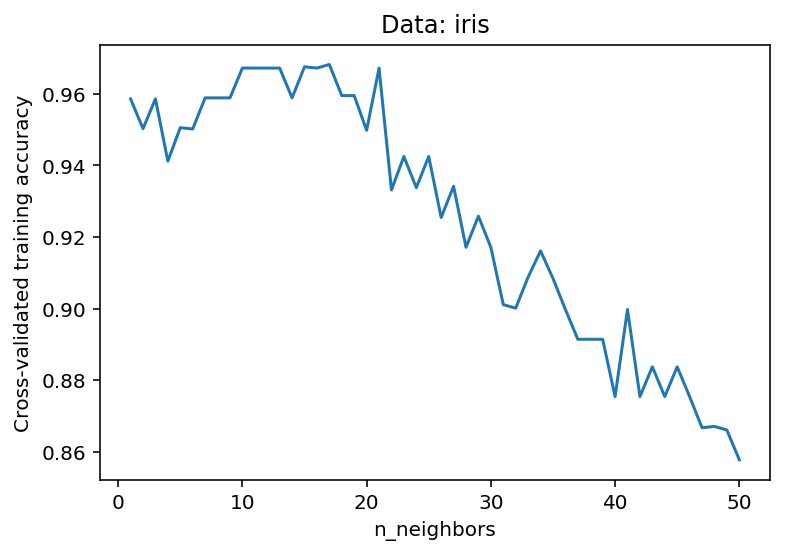

In [142]:
expl_plotter(knn_expl_results)

## svm: C (1e-7:1e3) with kernel='linear'; wdbc/income_5000/iris

In [73]:
svm_lin_expl = hyperparam_explorer.load('./wdbc_income5000_iris_svm_linear_C_1e-7_1e3')
svm_lin_results = svm_lin_expl.get_results()

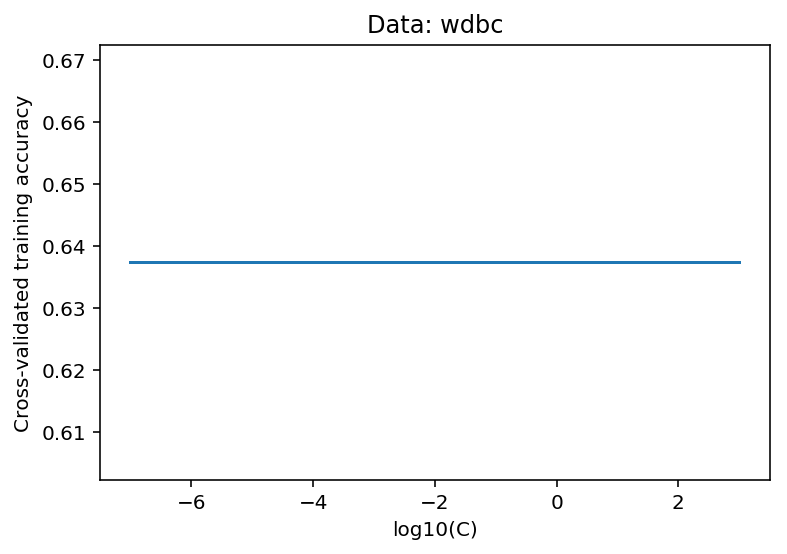

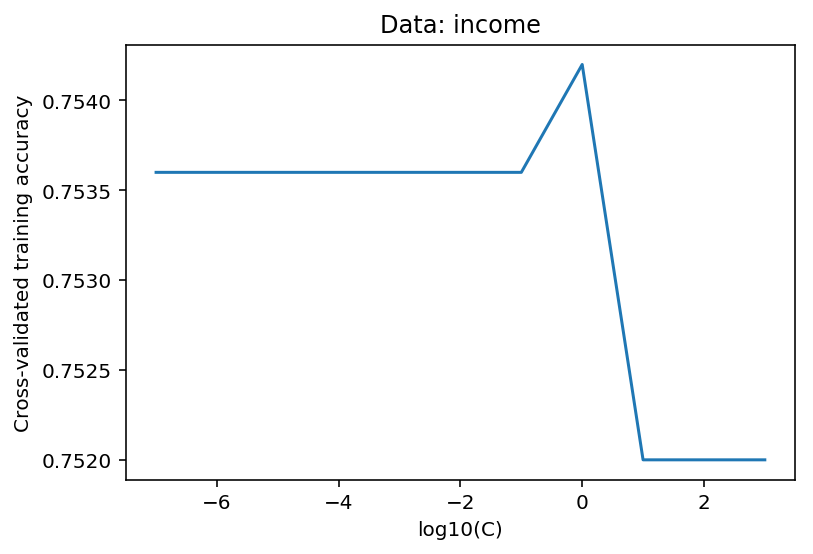

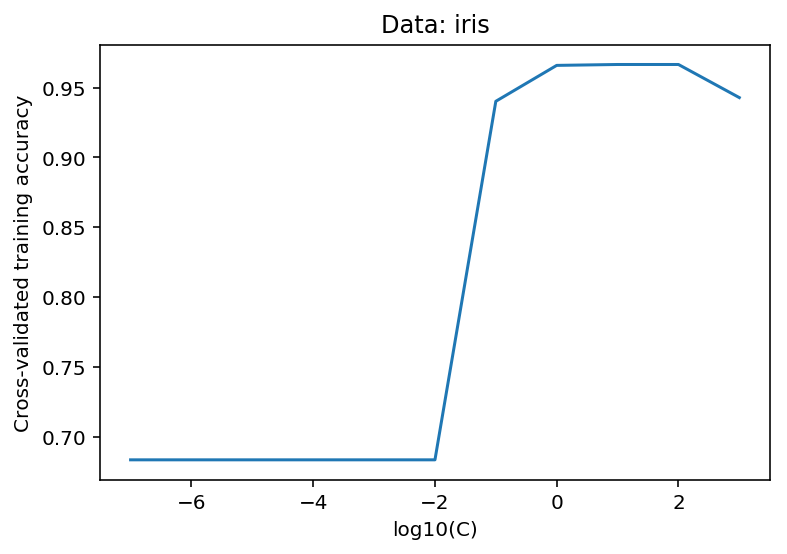

In [141]:
expl_plotter(svm_lin_results, x_log10=True)

# Package dev

In [126]:
# fig, ax = plt.subplots()


In [140]:
def expl_plotter(explorer_results, x_log10=False):
    for data_name, data_results in explorer_results.items():
        for clf_name, clf_results in data_results.items():
            fig, ax = plt.subplots()
            
            x = np.log10(clf_results.iloc[:, 0]) if(x_log10) else clf_results.iloc[:, 0]
            y = clf_results.iloc[:, 1]
            
            ax.plot(x, y)
            
            ax.set_title("Data: {}".format(data_name))
            
            hyperparam_name = clf_results.columns[0]
            x_ax_label_format_str = "log10({})" if x_log10 == True else "{}"
            x_ax_label = x_ax_label_format_str.format(hyperparam_name)
            ax.set_xlabel(x_ax_label)
            
            ax.set_ylabel('Cross-validated training accuracy')
            
            plt.show()

In [132]:
svm_lin_results['income']['svm'].columns

Index(['C', 'scores_mean', 'scores_sd'], dtype='object')